In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("stockprice.csv")
df1 = df.replace(',','', regex=True)
print(df1)

            Date    Open    High     Low   Close    Volume
0     01-03-2012  325.25  332.83  324.97  663.59   7380500
1     01-04-2012  331.27  333.87  329.08  666.45   5749400
2     01-05-2012  329.83  330.75  326.89  657.21   6590300
3     01-06-2012  328.34  328.77  323.68  648.24   5405900
4     01-09-2012  322.04  322.29  309.46  620.76  11688800
...          ...     ...     ...     ...     ...       ...
1253  12/23/2016  790.90  792.74  787.28  789.91    623400
1254  12/27/2016  790.68  797.86  787.66  791.55    789100
1255  12/28/2016  793.70  794.23  783.20  785.05   1153800
1256  12/29/2016  783.33  785.93  778.92  782.79    744300
1257  12/30/2016  782.75  782.78  770.41  771.82   1770000

[1258 rows x 6 columns]


In [3]:
X=df1.drop(['Date','Close'],axis=1)
print(X)
y=df1['Close']
print(y)


        Open    High     Low    Volume
0     325.25  332.83  324.97   7380500
1     331.27  333.87  329.08   5749400
2     329.83  330.75  326.89   6590300
3     328.34  328.77  323.68   5405900
4     322.04  322.29  309.46  11688800
...      ...     ...     ...       ...
1253  790.90  792.74  787.28    623400
1254  790.68  797.86  787.66    789100
1255  793.70  794.23  783.20   1153800
1256  783.33  785.93  778.92    744300
1257  782.75  782.78  770.41   1770000

[1258 rows x 4 columns]
0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: object


In [4]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
#training the model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [7]:
#predicting the data
predicted=regressor.predict(x_test)
print(predicted)

[ 798.84993148  748.97886185  625.10143787  733.2841663   835.89274099
  677.4919528   659.44621897  805.0383988   732.64445017  687.79767978
  668.51133065  660.10453557  619.67811397  715.2039566   647.51090093
  791.69741125  642.51222653  810.03095158  651.50890227  825.88317914
  619.22690474  683.6320058   651.45899312  739.58021522  833.19639237
  630.18501449  685.809662    633.25535023  743.85110275  698.48027292
  630.58112105  707.51921011  737.24496973  618.1311982   668.97270823
  615.53137108  637.63633841  798.93915707  706.28119549  742.68811426
  677.80778964  759.91400965  540.07483295  810.2397634   782.14794232
  730.06341706  731.30140654  689.43991273  638.86494384  840.29420163
  806.33907261  708.82440687  733.97634423  639.22609308  712.72140101
  678.75391782  678.54373733  746.96345562  733.88767992  609.06077514
  698.03883798  806.88216393  701.06102092  695.187967    703.49493741
  719.87294143  755.125047    682.32440778  708.88431258  787.36446052
  693.

In [8]:
df2=pd.DataFrame({'Actual':y_test,'predicted':predicted})
print(df2.head(10))

      Actual   predicted
5     621.43  798.849931
494  1083.25  748.978862
52    632.24  625.101438
985   762.38  733.284166
186   754.43  835.892741
18    576.11  677.491953
317   788.02  659.446219
511  1145.48  805.038399
364   883.82  732.644450
571   529.15  687.797680


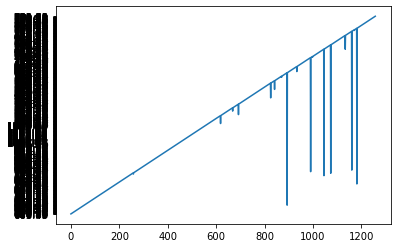

In [9]:
plt.plot(df1['Close'])

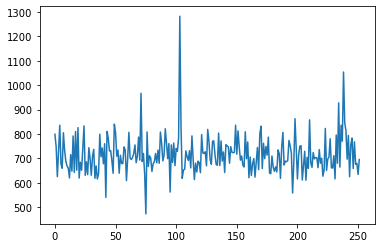

In [10]:
plt.plot(predicted)

In [11]:
regressor.intercept_

346.51213312521395

In [12]:
regressor.coef_

array([ 8.54583423e-01, -1.14948139e+01,  1.12805971e+01,  3.93098539e-05])

In [13]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,predicted)
print(mse)

23098.79884837522


In [14]:
rmse=np.sqrt(mse)
print(rmse)

151.98288998560074
